In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
base = pd.read_csv("/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")

# NORMALIZE DATA

**We need to normalize the data of dataframe and separaded the base attributes that you use.**

In [4]:
x = (base - base.min()) / (base.max() - base.min()) #Normalize to data
x = pd.DataFrame(x)
b_x = x.iloc[:,[0,1]].values

# PCA - Principal component analysis

**With this commands we can find the Principal component analysis of all the datas of dataframe and separeted the atributtes more important.**

In [5]:
pca = PCA()
pca_x = pca.fit_transform(x)
pca_x = pd.DataFrame(pca_x)
pca_x = pca_x.iloc[:, [0, 1]].values

**Showing the realationship of Principal components.**

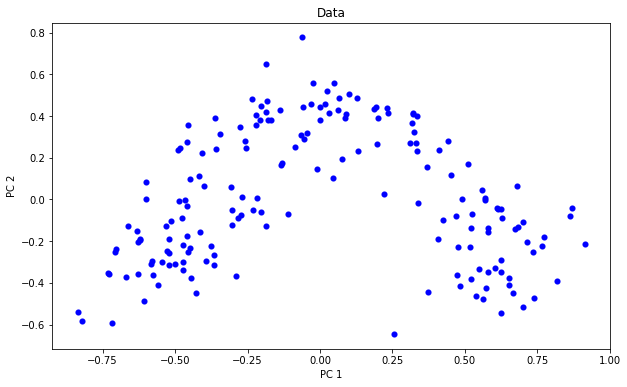

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(x=pca_x[:, 0], y=pca_x[:, 1], color='blue',lw=0.1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data')
plt.show()

# NUMBER OF CLURTERES

**Cluster analysis for raw data and PCA data**

Text(0, 0.5, 'WCSS')

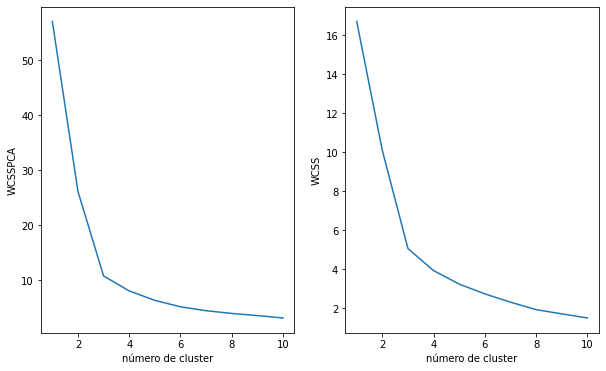

In [7]:
wcss_pca = []
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(pca_x)
    wcss_pca.append(kmeans.inertia_)
    
wcss = []
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(b_x)
    wcss.append(kmeans.inertia_)
    
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(range(1, 11), wcss_pca)
ax[0].set_xlabel('número de cluster')
ax[0].set_ylabel('WCSSPCA')
ax[1].plot(range(1, 11), wcss)
ax[1].set_xlabel('número de cluster')
ax[1].set_ylabel('WCSS')

**We see that the number ideal clurter, of the two case, is 3 according to the chart, but we'll use others commands of confirm it.**

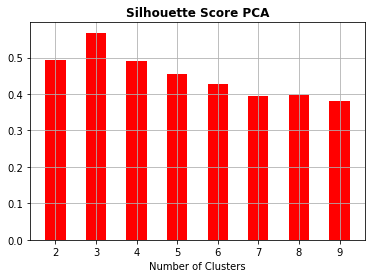

In [9]:
from sklearn.metrics import silhouette_score
silhouettePCA = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 0, init = 'k-means++')
    kmeans.fit(pca_x)
    silhouettePCA[i] = silhouette_score(pca_x, kmeans.labels_, metric='euclidean')

plt.bar(range(len(silhouettePCA)), list(silhouettePCA.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouettePCA)), list(silhouettePCA.keys()))
plt.grid()
plt.title('Silhouette Score PCA',fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

**With the silhouette score metric applied every cluster number, the number of cluster that appear the more score is 3, according we saw before.**

# Training of the method Kmeans

In [19]:
kmeans = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++')
pred = kmeans.fit_predict(pca_x)

**Show groups according to PCA**

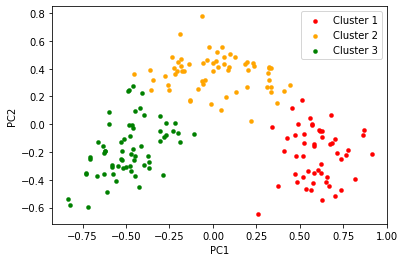

In [20]:
plt.scatter(pca_x[pred == 0, 0], pca_x[pred == 0, 1], s = 20, c = 'red', label = 'Cluster 1', lw = 0.1)
plt.scatter(pca_x[pred == 1, 0], pca_x[pred == 1, 1], s = 20, c = 'orange', label = 'Cluster 2', lw = 0.1)
plt.scatter(pca_x[pred == 2, 0], pca_x[pred == 2, 1], s = 20, c = 'green', label = 'Cluster 3', lw = 0.1)
#plt.scatter(pca_x[pred == 3, 0], pca_x[pred == 3, 1], s = 20, c = 'purple', label = 'Cluster 4', lw = 0.1)
#plt.scatter(pca_x[pred == 4, 0], pca_x[pred == 4, 18], s = 100, c = 'black', label = 'Cluster 5')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

**Silhouette Score**

In [21]:
scorePCA = silhouette_score(pca_x, kmeans.labels_)
print('Accuracy: ',silhouette_score(pca_x, kmeans.labels_))

Accuracy:  0.5680591392935428


**Show groups according to raw datas**

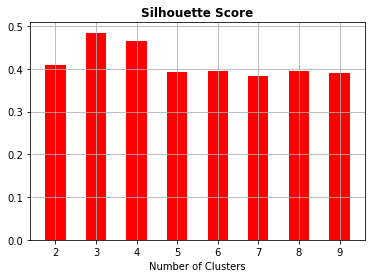

In [14]:
silhouette = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 0, init = 'k-means++')
    kmeans.fit(b_x)
    silhouette[i] = silhouette_score(b_x, kmeans.labels_, metric='euclidean')
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++')
pred = kmeans.fit_predict(b_x)

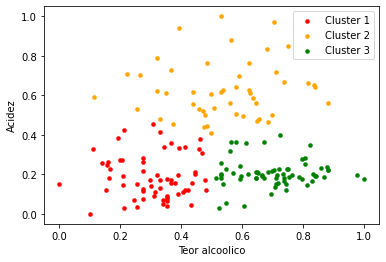

In [23]:
plt.scatter(b_x[pred == 0, 0], b_x[pred == 0, 1], s = 20, c = 'red', label = 'Cluster 1', lw = 0.1)
plt.scatter(b_x[pred == 1, 0], b_x[pred == 1, 1], s = 20, c = 'orange', label = 'Cluster 2', lw = 0.1)
plt.scatter(b_x[pred == 2, 0], b_x[pred == 2, 1], s = 20, c = 'green', label = 'Cluster 3', lw = 0.1)
#plt.scatter(x[pred == 3, 0], x[pred == 3, 1], s = 20, c = 'purple', label = 'Cluster 4', lw = 0.1)
#plt.scatter(pca_x[pred == 4, 0], pca_x[pred == 4, 18], s = 100, c = 'black', label = 'Cluster 5')
plt.xlabel('Teor alcoolico')
plt.ylabel('Acidez')
plt.legend()

In [24]:
score = silhouette_score(b_x, kmeans.labels_)
print('Accuracy: ',silhouette_score(b_x, kmeans.labels_))

Accuracy:  0.4846068714909165


In [26]:
print('Accuracy: ', scorePCA)
print('Accuracy: ', score)

Accuracy:  0.5680591392935428
Accuracy:  0.4846068714909165


# CONCLUTION

**We can see that aplication of the Principal component analysis we get a more score because the process PCA create a dataframe with datas correlated every atributte.**